In [5]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale

from sklearn.datasets import load_wine
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import numpy as np

SEED = 42

In [4]:
data = load_boston()
X = scale(data['data'])
y = data['target']
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [7]:
def write2file(num, filename):
    with open(filename, 'w') as f:
        f.write(f"{num}")

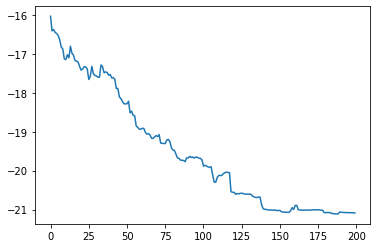

In [15]:
kf = KFold(n_splits=5, shuffle=True, random_state=SEED)
max_score = 0
p_min = 0
acc = []
for p in np.linspace(1, 10, 200):
    clf = KNeighborsRegressor(n_neighbors=5, weights='distance', p=p)
    score = cross_val_score(clf, X, y, scoring='neg_mean_squared_error', cv=kf)
    score = np.mean(score)
#     if score > max_score:
#         p_min = p
#         max_score = score
    acc.append(score)

p_min = np.argmin(score) + 1
    
plt.plot(acc)
write2file(round(p_min, 1), '1.txt')